In [3]:
import pandas as pd
bankfull=pd.read_csv("./sample_data/bank-full.csv",sep=";")
bankfull.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [4]:
bankfull.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10339,57,entrepreneur,married,unknown,no,657,no,no,unknown,12.0,jun,344.0,1.0,-1.0,0.0,unknown,no
10340,58,retired,married,primary,no,657,yes,no,unknown,12.0,jun,128.0,2.0,-1.0,0.0,unknown,no
10341,36,blue-collar,married,primary,no,398,yes,no,unknown,12.0,jun,278.0,1.0,-1.0,0.0,unknown,no
10342,38,admin.,married,secondary,no,545,no,no,unknown,12.0,jun,436.0,1.0,-1.0,0.0,unknown,no
10343,50,unknown,single,unknown,no,490,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's model the number of calls taken to convert a client as a geometric distribution and see if that matches with our empirical distribution

Estimated parameter 'p' for geometric distribution: 0.3896


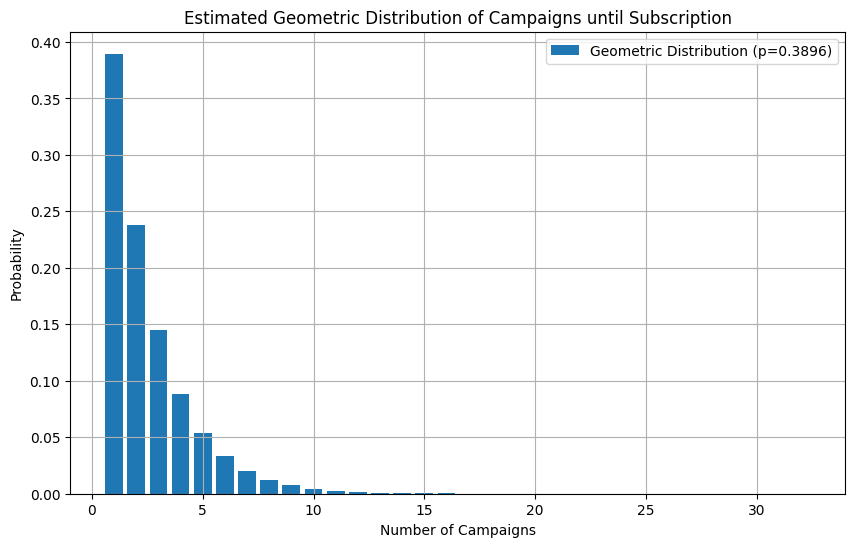

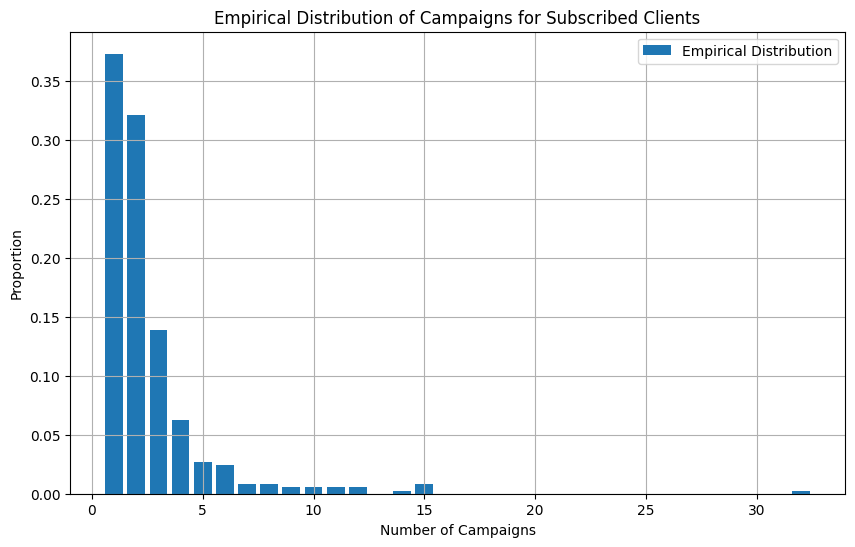

In [5]:
from scipy.stats import geom
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to include only clients who subscribed ('yes')
subscribed_clients = bankfull[bankfull['y'] == 'yes']

# Get the campaign values for subscribed clients
campaign_data = subscribed_clients['campaign']

# Calculate the maximum number of campaigns for plotting
max_campaign = campaign_data.max()

# Calculate the mean of the campaign data for subscribed clients
mean_campaign = campaign_data.mean()

# The parameter 'p' for the geometric distribution is 1 / mean
p_estimate = 1 / mean_campaign
print(f"Estimated parameter 'p' for geometric distribution: {p_estimate:.4f}")

# Create a geometric distribution with the estimated parameter
geometric_dist = geom(p_estimate)

# Generate values for the x-axis (number of campaigns)
x = np.arange(1, max_campaign + 1)

# Calculate the probability mass function (PMF) for each x value
pmf_values = geometric_dist.pmf(x)

# Plot the estimated geometric distribution
plt.figure(figsize=(10, 6))
plt.bar(x, pmf_values, label=f'Geometric Distribution (p={p_estimate:.4f})')
plt.xlabel('Number of Campaigns')
plt.ylabel('Probability')
plt.title('Estimated Geometric Distribution of Campaigns until Subscription')
plt.legend()
plt.grid(True)
plt.show()

# You can also compare this to the empirical distribution of campaigns for subscribed clients
campaign_counts = campaign_data.value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
plt.bar(campaign_counts.index, campaign_counts.values, label='Empirical Distribution')
plt.xlabel('Number of Campaigns')
plt.ylabel('Proportion')
plt.title('Empirical Distribution of Campaigns for Subscribed Clients')
plt.legend()
plt.grid(True)
plt.show()

Validated, the given dataset, models Geometric Distribution

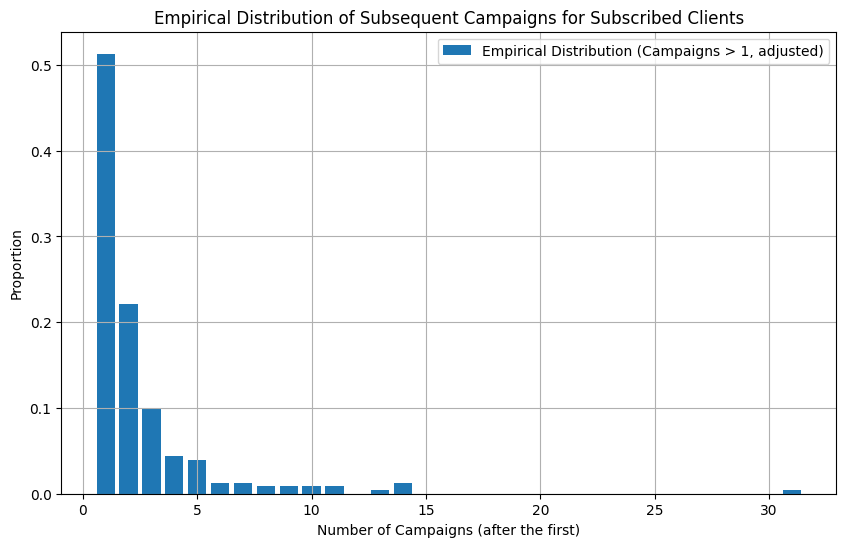

In [6]:
# Filter the DataFrame to include only clients who subscribed ('yes') and had more than 1 campaign
subscribed_clients_gt1 = bankfull[(bankfull['y'] == 'yes') & (bankfull['campaign'] > 1)].copy()

# Adjust the campaign values for these clients by subtracting 1
subscribed_clients_gt1['campaign_adjusted'] = subscribed_clients_gt1['campaign'] - 1

# Get the adjusted campaign values for plotting
campaign_data_adjusted = subscribed_clients_gt1['campaign_adjusted']

# Calculate the proportion of each adjusted campaign value
campaign_counts_adjusted = campaign_data_adjusted.value_counts(normalize=True).sort_index()

# Plot the empirical distribution of campaigns for subscribed clients with more than 1 campaign (adjusted)
plt.figure(figsize=(10, 6))
plt.bar(campaign_counts_adjusted.index, campaign_counts_adjusted.values, label='Empirical Distribution (Campaigns > 1, adjusted)')
plt.xlabel('Number of Campaigns (after the first)')
plt.ylabel('Proportion')
plt.title('Empirical Distribution of Subsequent Campaigns for Subscribed Clients')
plt.legend()
plt.grid(True)
plt.show()